<a href="https://colab.research.google.com/github/ruiiary/on-research/blob/main/exchange_openchat_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 교환학생 정보 교류 카카오톡 오픈채팅방 온라인 관찰 개요
1. **raw 데이터 가져오기**
- 데이터 수집 기간 : 2023.09.14. ~ 2024.12.24.
- 채팅방 이름 : 🇰🇷 교환학생 정보 교류 🇰🇷 (https://open.kakao.com/o/g8HWlWwg)
- 방식 : Python과 pandas, matplotlib 라이브러리를 활용한 데이터 분석  
- 데이터 형식 : csv, 카카오톡 채팅방 내 대화 내용 저장 기능을 통해 csv 파일로 저장 <br>
- 채팅방 인원 : 740명 (기간 내 새로 들어온 인원: 343명 / 나간 인원: 236명)

2. **데이터 전처리** <br>
불필요한 메세지("OO님이 들어왔습니다", "OO님이 나갔습니다", 방장봇 메세지) 제거

3. **데이터 분석**
- 메세지 워드클라우드 시각화(Okt ver./ Hannanum ver.)
- 월별 메세지 개수
- 유저 중 헤비유저 분석
- 수동 카테고라이징 <br>

4. **문서 작업** <br>
오픈채팅방 관련 설명, 온라인 관찰 진행 배경, 데이터 분석 절차 설명 등

### 1. raw 데이터 가져오기

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df_kakao = pd.read_csv('KakaoTalk_Chat_exchange_info_networking_2024-12-24-15-04-52.csv')

In [ ]:
# 데이터 전 처리 전 raw 데이터프레임의 전체 길이 출력
len(df_kakao)

2161

### 2. 데이터 전처리 작업

In [ ]:
# "OO님이 들어왔습니다/나갔습니다"는 데이터에서 제외하기

# 문구 개수를 측정하여, 기간 내 들어온 인원과 나간 인원 확인
entrance = df_kakao[df_kakao['Message'].str.contains("님이 들어왔습니다", na=False, case=False)]
print("기간 내 들어온 인원:", len(entrance))

leave = df_kakao[df_kakao['Message'].str.contains("님이 나갔습니다", na=False, case=False)]
print("기간 내 나간 인원:", len(leave))

# df_kakao에서 entrance 메세지, leave 메세지, 방장봇 메세지 제거하기
df_kakao = df_kakao[~df_kakao['Message'].str.contains("님이 들어왔습니다", na=False, case=False)]
df_kakao = df_kakao[~df_kakao['Message'].str.contains("님이 나갔습니다", na=False, case=False)]
df_kakao = df_kakao[~df_kakao['Message'].str.contains("방장봇", na=False, case=False)]


기간 내 들어온 인원: 343
기간 내 나간 인원: 236


In [ ]:
print("전처리 후 메세지 개수:", len(df_kakao))

전처리 후 메세지 개수: 1582


In [ ]:
df_kakao.to_csv('new_kakao.csv')

### 3. 데이터 분석
- 메세지 워드클라우드 시각화
- 날짜 기간별 메세지 분포도 분석
- 분기별/월별 메세지 개수
- 유저 중 헤비유저 비율 분석
- 수동 카테고라이징

### 3-1. 워드클라우드 빈출 단어 시각화

In [ ]:
# 1)메세지 내용 시각화
# 정확성을 높이기 위해 2차 전처리 작업 : "삭제된 메시지입니다."도 제거
delete_msg = df_kakao[df_kakao['Message'].str.contains("삭제된 메시지입니다.", na=False, case=False)]
new_df = df_kakao[~df_kakao['Message'].str.contains("삭제된 메시지입니다.", na=False, case=False)]

print("기간 내 삭제된 메세지의 개수", len(delete_msg))
print(len(new_df))


기간 내 삭제된 메세지의 개수 19
1563


In [ ]:
# 워드클라우드 한글 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# 한국어 자연어처리 패키지 다운로드, 단어를 쪼개서 명사만 남김
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 32.5 MB/s eta 0:00:00


In [ ]:
# 워드클라우드에서 사용할 라이브러리 import
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt # 위 라이브러리에서 명사를 구분해 주는 함수, txt 파일은 Okt 사용
import numpy as np # 일렬 배열도 만들 거라 Numpy 사용

In [ ]:
# 텍스트 분석하기
import pandas as pd
from konlpy.tag import Okt

# 분석하려는 특정 열이 'text'라고 가정
# 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(df_kakao['Message'].astype(str).tolist())

# 텍스트 분석
okt = Okt()
nouns = okt.nouns(text)

words = [n for n in nouns if len(n)>1] # 한 글자짜리 데이터는 버림
c = Counter(words)

print(c, words)

Counter({'혹시': 209, '학교': 105, '학기': 102, '비자': 98, '교환': 94, '교환학생': 88, '미국': 78, '준비': 76, '신청': 68, '정도': 62, '토플': 59, '생각': 56, '추천': 54, '메일': 50, '지금': 48, '공부': 48, '여행': 48, '가요': 47, '독일': 47, '파견': 46, '연락': 46, '유럽': 46, '기숙사': 44, '정보': 44, '그냥': 42, '경우': 40, '한국': 40, '해외': 39, '국가': 37, '친구': 35, '기간': 35, '여기': 35, '카페': 34, '지원': 33, '학생': 32, '보통': 32, '고민': 32, '영어': 32, '선택': 31, '영국': 29, '대학': 29, '전공': 29, '예정': 28, '학년': 28, '다른': 27, '한번': 26, '확인': 26, '공지': 26, '걱정': 26, '관련': 25, '바로': 25, '메시지': 25, '시간': 25, '카카오': 25, '생활': 25, '답변': 24, '시험': 24, '톡방': 24, '질문': 24, '발급': 24, '보고': 23, '저희': 23, '하나': 23, '스페인': 23, '대학교': 22, '사용': 22, '정말': 22, '보험': 22, '환전': 22, '개월': 22, '스피킹': 21, '캐나다': 21, '일본': 21, '학점': 21, '유심': 21, '수업': 20, '시작': 20, '공유': 20, '카드': 20, '스터디': 20, '출국': 19, '나라': 19, '삭제': 19, '오픈': 19, '문의': 19, '확정': 19, '링크': 19, '아이엘츠': 19, '언제': 18, '도움': 18, '한양대': 18, '사람': 17, '비용': 17, '사진': 17, '네덜란드': 17, '채팅': 17, '거의': 17, '수수

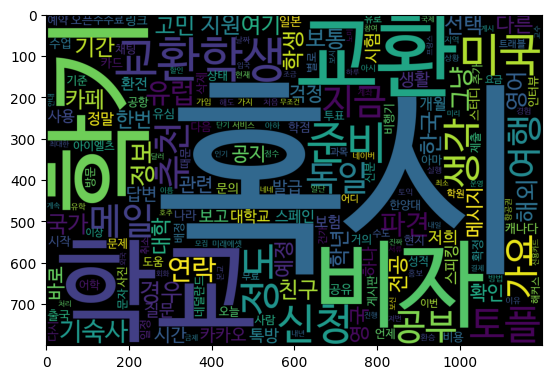

In [ ]:
# 워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=600, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc.png')

In [ ]:
# 혹시 제거

words = [n for n in nouns if len(n) > 1 and n not in ["혹시"]]
# 단어 빈도수 계산
c = Counter(words)

print(c, words)

Counter({'학교': 105, '학기': 102, '비자': 98, '교환': 94, '교환학생': 88, '미국': 78, '준비': 76, '신청': 68, '정도': 62, '토플': 59, '생각': 56, '추천': 54, '메일': 50, '지금': 48, '공부': 48, '여행': 48, '가요': 47, '독일': 47, '파견': 46, '연락': 46, '유럽': 46, '기숙사': 44, '정보': 44, '그냥': 42, '경우': 40, '한국': 40, '해외': 39, '국가': 37, '친구': 35, '기간': 35, '여기': 35, '카페': 34, '지원': 33, '학생': 32, '보통': 32, '고민': 32, '영어': 32, '선택': 31, '영국': 29, '대학': 29, '전공': 29, '예정': 28, '학년': 28, '다른': 27, '한번': 26, '확인': 26, '공지': 26, '걱정': 26, '관련': 25, '바로': 25, '메시지': 25, '시간': 25, '카카오': 25, '생활': 25, '답변': 24, '시험': 24, '톡방': 24, '질문': 24, '발급': 24, '보고': 23, '저희': 23, '하나': 23, '스페인': 23, '대학교': 22, '사용': 22, '정말': 22, '보험': 22, '환전': 22, '개월': 22, '스피킹': 21, '캐나다': 21, '일본': 21, '학점': 21, '유심': 21, '수업': 20, '시작': 20, '공유': 20, '카드': 20, '스터디': 20, '출국': 19, '나라': 19, '삭제': 19, '오픈': 19, '문의': 19, '확정': 19, '링크': 19, '아이엘츠': 19, '언제': 18, '도움': 18, '한양대': 18, '사람': 17, '비용': 17, '사진': 17, '네덜란드': 17, '채팅': 17, '거의': 17, '수수료': 17, '오늘

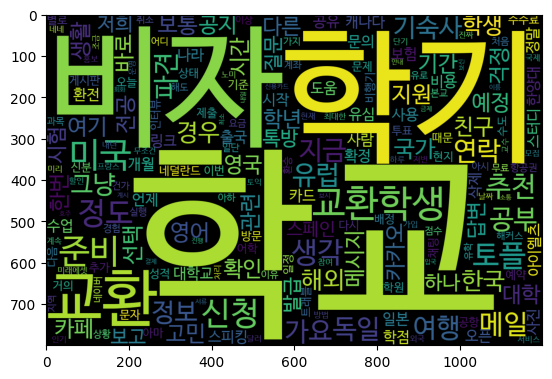

In [ ]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=600, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc3.png')

### 3-1. Hannanum 라이브러리 사용하여 워드클라우드 생성

In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx
from konlpy.tag import Hannanum

hannanum = Hannanum()

# 파일 열고 분석
import pandas as pd
from konlpy.tag import Hannanum

# 모든 메시지를 하나의 문자열로 결합
text = ' '.join(df_kakao['Message'].astype(str))

# Hannanum으로 분석
hannanum = Hannanum()
nouns = hannanum.nouns(text)

words = [n for n in nouns if len(n)>1] # 한 글자짜리 데이터는 버림
c = Counter(words)

print(words, c)

['이모티콘', '파견', '예정', '25-1', '파견예정', '출국언제쯤', '파견', '25-1', '워싱턴대학교', '봄학기', '연락주세욤', '안녕', '영국', '교환', '준비', '학생', '버튼대학교', '요크세인트존대학교,', '울버햄튼,', '리즈대학교', '어디', '추천', '🙏🏻', '기숙사', '사용', '불가능', '기숙사', '경우', '유럽학교', '우리나라', '자취하', '개념', '많은걸', '원격', '부동산', '계약', '입국', '거기', '친구', '셰어하우스', '사람', '원격', '집구하는', 'ㅠㅠ', '나라', '이름', '집구하', '독일(에서)', '네이버', '검색', '거예요', '독일이에용', '검색해보겠슴다', '독일', '베를린리포트', '런던', '대학교', '파견가시', '궁금', '여쭤봅니당', '저요', '이번학기', '24-2', '25-1', '출국', '출국', '노미', '어플리케이션', '수업', '긱사', '등등', '관련해', '것들', '넵넵', '/gyqb8QOg', '감사', 'ㅠㅡㅠㅡㅠㅡㅠ', '안녕', '교환학생', '신청기간', '2주', '토플', '성적제출', '지장', '성적', '10-15일', '성적', '신청', '절차', '필요', '궁금', '궁금', '정석', '괜찮긴', '토플', '결과', '예상', '기간', '안나오', '경우', '감안', '일주일', '답변', '감사', '성적', '온라인', '지원', '다운', '이틀', '있긴', '시험', '토플', '성적증명서', '토플', '관련', '서류', '끝이에용', '도움', '감사', '지원', '어플리케이션', '서류', '제출', '이메', '소아스', '준비중', 'ㅠㅠ', '25-1', '뉴저지', '공과대학(NJIT)', '삭제', '메시지', '토플', '시험', '직전', '꿀팁같', '있을까요ㅠㅠ', '불안', '리딩', '지문', '나올까봐', '체감', '난이도

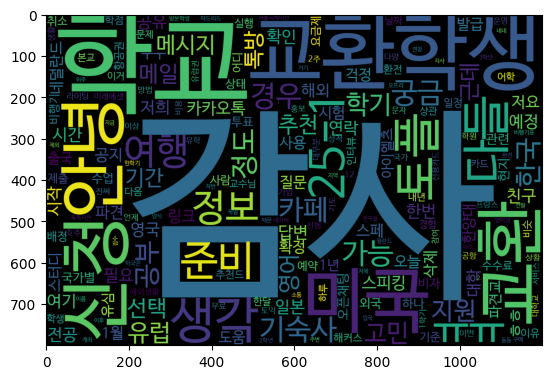

In [ ]:
# 워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=600, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc2.png')

#### 주요 대화 주제를 가시적으로 출력하기 위해, 인사 word는 제외
-> 연구 윤리에 벗어나는 건지 확인해볼 것

In [ ]:
words = [n for n in nouns if len(n) > 1 and n not in ["안녕", "감사"]]
# 단어 빈도수 계산
c = Counter(words)

print(c, words)

Counter({'학교': 88, '교환학생': 81, '미국': 60, '신청': 58, '교환': 57, '생각': 51, '토플': 49, '다들': 49, '25-1': 46, '준비': 42, 'ㅠㅠ': 40, '정보': 39, '여행': 39, '기숙사': 38, '궁금': 37, '경우': 36, '가능': 36, '정도': 34, '카페': 33, '한국': 32, '공부': 31, '학기': 30, '지원': 29, '고민': 29, '유럽': 28, '추천': 25, '메시지': 25, '메일': 25, '선택': 25, '영어': 25, '기간': 24, '근데': 24, '톡방': 24, '카카오톡': 24, '연락': 24, '한번': 23, '저희': 23, '여기': 23, 'ㅎㅎ': 23, '예정': 22, '영국': 22, '친구': 22, '일본': 22, '전공': 22, '답변': 21, '스피킹': 21, '확인': 21, '필요': 20, '시간': 20, '시작': 20, '공유': 20, '파견': 19, '저요': 19, '삭제': 19, '스페': 19, '공지': 19, '링크': 19, '대학': 19, '해외': 19, '질문': 18, '걱정': 18, '발급': 18, '스터디': 18, '사용': 17, '시험': 17, '도움': 17, '네덜란드': 17, '확정': 17, '오늘': 17, '1월': 17, '한양대': 17, '출국': 16, '아이엘츠': 16, '파견교': 16, 'ㅜㅜ': 16, '1년': 16, '유심': 16, '관련': 15, '오픈채팅': 15, '현지': 15, '수업': 14, '하나': 14, '투표': 14, '외국': 14, '국가별': 14, '비자': 14, '어디': 13, '사람': 13, '제출': 13, '상태': 13, '기준': 13, '수수료': 13, '배정': 13, '취소': 13, '예약': 13, '요금제': 13, '비행기': 13,

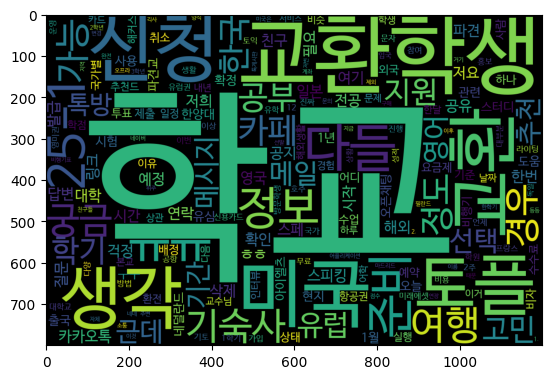

In [ ]:
# 워드클라우드 생성하기
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',width=600, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)

plt.figure()
plt.imshow(gen)
wc.to_file('kakao_wc3.png')

### 3-2. 날짜 기간별 메세지 분포도 분석

In [ ]:
# Date 열에서 날짜 부분만 남기기
new_df['Date'] = pd.to_datetime(new_df['Date']).dt.date

# Date 열을 월 단위로 변환
new_df['Date'] = pd.to_datetime(new_df['Date']).dt.to_period('M')

<ipython-input-26-a84cc3d61867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = pd.to_datetime(new_df['Date']).dt.date
<ipython-input-26-a84cc3d61867>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Date'] = pd.to_datetime(new_df['Date']).dt.to_period('M')


In [ ]:
new_df[900:1000]

,Date,User,Message
1310,2024-11,미국-UC-샤,저는 이용하는 항공사가 왕복으로 하고 일정변경 수수료 내는 게 더 저렴해서 왕복으로...
1312,2024-11,미국-펜실베니아-추나,학기 종료 후 캐나다 여행 동행 구해봅니다 !! 날짜는 12/13-12/20정도 생...
1316,2024-11,미국-미시시피-보리,제가 한국에서 미국으로 두번 환승해야하는 항공편을 구매했는데요. 처음 타는 비행기에...
1317,2024-11,미국-미시시피-보리,그리고 환승 해보신 분들 어떠셨는지... 궁금합니다!
1319,2024-11,네덜란드-위트레흐트-무지,수하물 분실됐다가 4일 후에 찾았어요 대한항공에서 klm 환승했습니다. 바로 학교 ...
...,...,...,...
1444,2024-11,교환준비 - 뵤,그렇군요 감사합니다!
1445,2024-11,auswlek,이거 학교마다 기간 달라서 확인해봐야해요!
1446,2024-11,미국 뉴욕버팔로 청소하는 튜브,비행기표는 최대한 빨리 사야 덜 비싸지 않나요? 전 두달전에 표 끊었어요
1447,2024-11,미국 뉴욕버팔로 청소하는 튜브,물론 미국이랑 유럽은 또 달라서… 본인이 잘 찾아보셔야 할듯여


Date
2024-09    308
2024-10    282
2024-11    464
2024-12    509
Freq: M, Name: count, dtype: int64


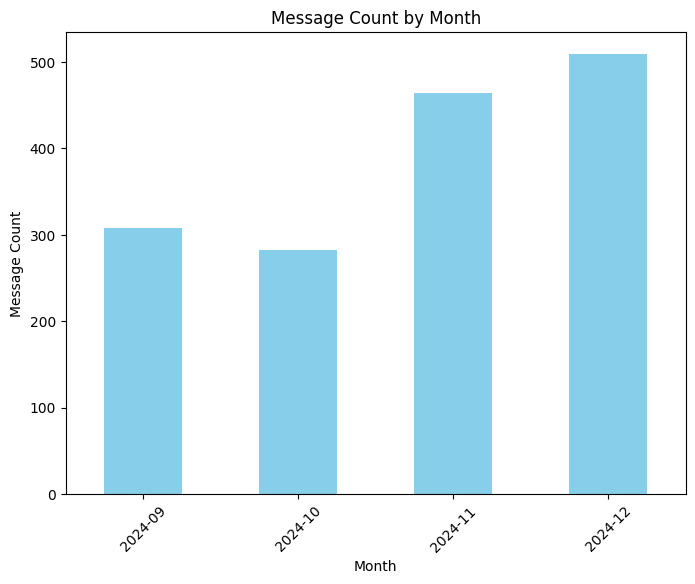

In [ ]:
# 월별 메시지 수 계산 및 정렬
monthly_counts = new_df['Date'].value_counts().sort_index()
print(monthly_counts)

# 그래프 그리기
plt.figure(figsize=(8, 6))
monthly_counts.plot(kind='bar', color='skyblue')
plt.title("Message Count by Month")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.show()

### 3-3. 유저별 메세지 수 분석

In [ ]:
# 'User' 별로 메시지 개수 세기
user_message_counts = new_df.groupby('User').size()

# 내림차순으로 정렬
user_message_counts = user_message_counts.sort_values(ascending=False)

# 'User'와 메시지 개수를 하나의 데이터프레임으로 변환
user_message_counts_df = user_message_counts.reset_index(name='Message Count')

# 결과 출력
#user_message_counts_df

In [ ]:
# 'Message Count' 별로 유저 수 계산(활성 유저 확인)
message_count_user = user_message_counts_df.groupby('Message Count').size().reset_index(name='User Count')

# 결과 출력
message_count_user

new_row = pd.DataFrame({'Message Count': [0], 'User Count': [441]})

# 기존 데이터프레임에 새로운 행 추가
message_count_user = pd.concat([message_count_user, new_row], ignore_index=True)

message_count_user

,Message Count,User Count
0,1,79
1,2,38
2,3,26
3,4,35
4,5,15
5,6,11
6,7,12
7,8,10
8,9,5
9,10,5


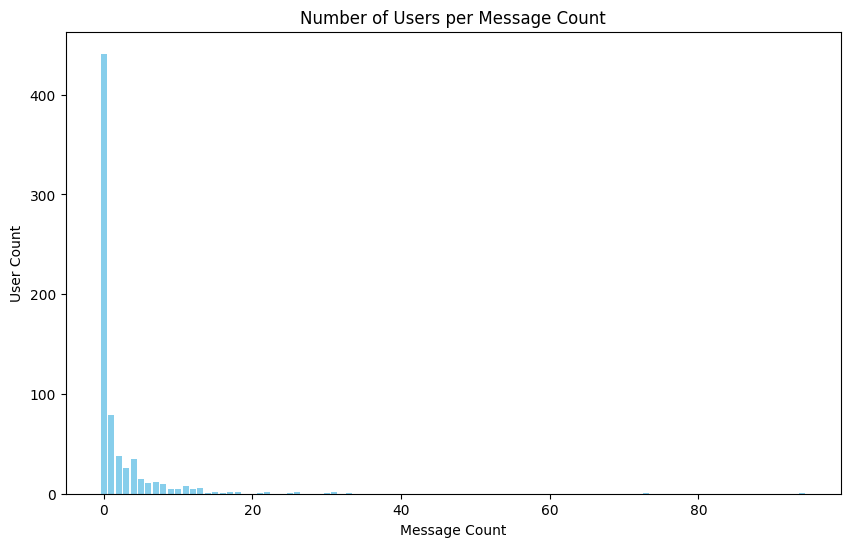

In [ ]:
import matplotlib.pyplot as plt

# 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(message_count_user['Message Count'], message_count_user['User Count'], color='skyblue')

# 그래프 제목과 레이블 설정
plt.title('Number of Users per Message Count')
plt.xlabel('Message Count')
plt.ylabel('User Count')

# 그래프 출력
plt.show()

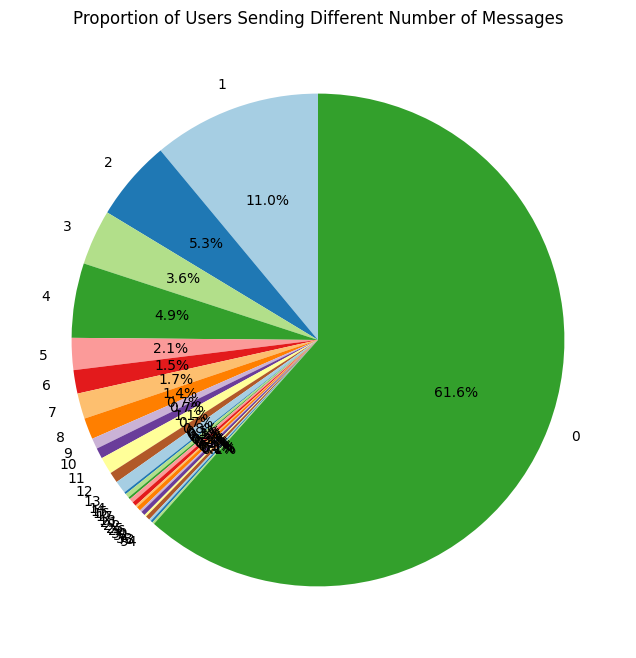

In [ ]:
import matplotlib.pyplot as plt

# 전체 유저 수
total_users = new_df['User'].nunique()

# 각 메시지 수를 보낸 유저 수 비율 계산
message_count_user['User Count Ratio'] = message_count_user['User Count'] / total_users

# 원형 그래프 그리기
plt.figure(figsize=(8, 8))
plt.pie(message_count_user['User Count Ratio'], labels=message_count_user['Message Count'],
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# 그래프 제목 설정
plt.title('Proportion of Users Sending Different Number of Messages')

# 그래프 출력
plt.show()